### Prelim EDA and Data Cleaning

**Note:** google colab doesn't support magic line, please comment-in `%matplotlib.inline` before running notebook in Jupyter.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

#%matplotlib.inline

In [2]:
# Read file from github as dataframe

df_spray = pd.read_csv('./datasets/predict-west-nile-virus/spray.csv/spray.csv')
df_test = pd.read_csv('./datasets/predict-west-nile-virus/test.csv/test.csv')
df_train = pd.read_csv('./datasets/predict-west-nile-virus/train.csv/train.csv')
df_weather = pd.read_csv('./datasets/predict-west-nile-virus/weather.csv/weather.csv')

In [3]:
# Define function for basic eda

def data_explore(df):
    #First two rows
    print("First two rows of data:")
    display(df.head(2))
    print()
    # Print shape of dataframe
    print(f"Shape: {df.shape}")
    print()
    # Print datatypes
    print("Columns & Datatypes: ")
    df.info()
    print()
    # Check for null values
    print("Null values:")
    if df.isnull().values.any() == False:
        print("None in Dataframe.")
    else:
        for col in df:
            print(f"{col}:{df[col].isnull().sum()}")
    print()
    # Count of distinct values
    print("Unique values (by Columns)")
    for col in df:
        print(f"{col}:{len(df[col].unique().tolist())}")
    print()
    # Inform if there are duplicates, if any
    if df.duplicated(subset=None, keep='first').any() == False:
      print("No duplicates present.")
    else:
        dup = df[df.duplicated(subset=None, keep='first')]
        print(f"{len(dup)} duplicates in {len(df)} rows.")

In [4]:
# Define function to review duplicates
# Only relevant for dataframe with duplicates
def review_dup(df): 
    print("First 5 rows of duplicates:")
    display(df[df.duplicated(subset=None, keep='first')].head())

In [5]:
# Define function to drop duplicates and review rows
# Only relevant for dataframe with duplicates
def drop_dup(df):
    print(f"Initial rows: {df.shape[0]}")
    df.drop_duplicates(subset=None, inplace=True)
    print(f"Remaining rows: {df.shape[0]}")

### Spray data

In [6]:
# Review spray data
data_explore(df_spray)

First two rows of data:


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163



Shape: (14835, 4)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB

Null values:
Date:0
Time:584
Latitude:0
Longitude:0

Unique values (by Columns)
Date:10
Time:8584
Latitude:12887
Longitude:13007

541 duplicates in 14835 rows.


- 584 null values in `time` column. 
- 541 duplicates. 
- Further review to determine way to manage null value and duplicates.

In [7]:
# Set column name to lowercase, shorten if possible.
df_spray.columns = ['date', 'time', 'lat', 'long']
# Convert date to datetime format
df_spray['date'] = pd.to_datetime(df_spray['date'], format='%Y-%m-%d')

In [8]:
df_spray['date']

0       2011-08-29
1       2011-08-29
2       2011-08-29
3       2011-08-29
4       2011-08-29
           ...    
14830   2013-09-05
14831   2013-09-05
14832   2013-09-05
14833   2013-09-05
14834   2013-09-05
Name: date, Length: 14835, dtype: datetime64[ns]

In [9]:
df_spray['date'].unique()

array(['2011-08-29T00:00:00.000000000', '2011-09-07T00:00:00.000000000',
       '2013-07-17T00:00:00.000000000', '2013-07-25T00:00:00.000000000',
       '2013-08-08T00:00:00.000000000', '2013-08-15T00:00:00.000000000',
       '2013-08-16T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [10]:
# Review NaN value in spray data; first 5 rows
df_spray.loc[df_spray['time'].isnull()].head()

,date,time,lat,long
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014


The missing values seems to be in the Time, but we can review the entire dataframe using Missingno method.

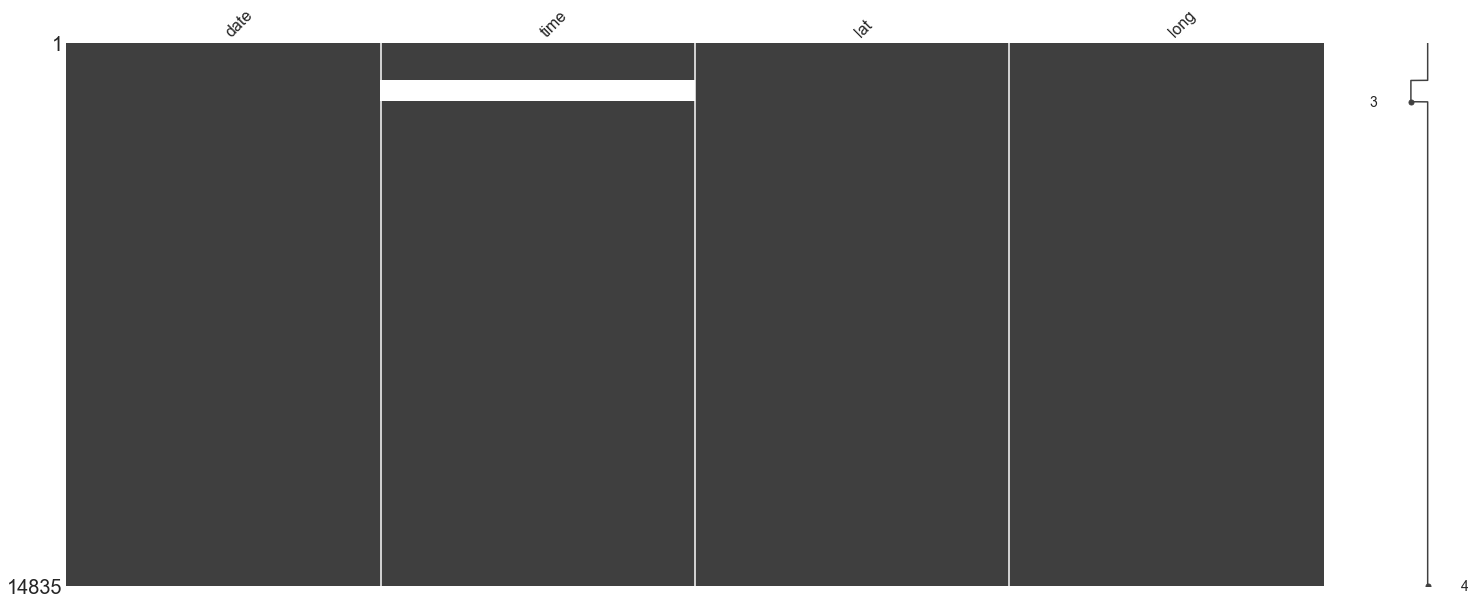

In [11]:
#Visualize missing values as a matrix using Missingno
#shows the amount and positions of missing values within the dataframe
#right hand side is line plot for each row's data completeness
#all columns completed except Time coloumn (beginning part of the dataframe)
msno.matrix(df_spray);

Missingno matrix facilitates locating visually, missing values within a dataframe. In this instance, `time` column has missing values in the upper part of the spray data. We could rely on `date`; seems adequate (for now) to inform on areas sprayed over time. We can always revisit to impute the NaN values for `time` later if the time values are selected as predictor.

In [12]:
# Review duplicate in dataframe
review_dup(df_spray)

First 5 rows of duplicates:


,date,time,lat,long
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
492,2011-09-07,7:44:32 PM,41.986460,-87.794225
493,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [13]:
# Drop duplicates, reset index
drop_dup(df_spray)
df_spray.reset_index(inplace=True,drop=True)
df_spray.head()

Initial rows: 14835
Remaining rows: 14294


,date,time,lat,long
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [14]:
# Checking the range of lat and lon between spray, train and test data
display(df_test.describe())
display(df_train.describe())

,Id,Block,Latitude,Longitude,AddressAccuracy
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.131100,41.849389,-87.693658,7.954357
std,33571.041765,24.864726,0.106593,0.080699,1.252733
min,1.000000,10.000000,41.644612,-87.930995,3.000000
25%,29074.000000,18.000000,41.753411,-87.750938,8.000000
50%,58147.000000,39.000000,41.862292,-87.694991,8.000000
75%,87220.000000,61.000000,41.951866,-87.648860,9.000000
max,116293.000000,98.000000,42.017430,-87.531635,9.000000


,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [15]:
# Dropping row in spray data where lat-long values beyond train and test lat-lon.
# Remove those where long > -88.0; latitude > 42.1
df_spray.describe()

,lat,long
count,14294.000000,14294.000000
mean,41.901739,-87.734512
std,0.105100,0.067599
min,41.713925,-88.096468
25%,41.782669,-87.789607
50%,41.937578,-87.724781
75%,41.977217,-87.692107
max,42.395983,-87.586727


In [16]:
# long within test and train long range
# Remove rows with lat > 42.1, assign to df_s
df_s = df_spray[df_spray['lat'] <= 42.1]

In [17]:
# Check lat max is within range
df_s.describe()

,lat,long
count,14199.000000,14199.000000
mean,41.898456,-87.732111
std,0.097461,0.061096
min,41.713925,-87.871023
25%,41.782290,-87.788612
50%,41.937205,-87.724390
75%,41.976710,-87.691572
max,42.018907,-87.586727


In [18]:
# Checking off datatypes of cleaned spray data
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199 entries, 95 to 14293
Data columns (total 4 columns):
date    14199 non-null datetime64[ns]
time    13615 non-null object
lat     14199 non-null float64
long    14199 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 554.6+ KB


### Test data

In [19]:
# Review test data
data_explore(df_test)

First two rows of data:


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9



Shape: (116293, 11)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
Id                        116293 non-null int64
Date                      116293 non-null object
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB

Null values:
None in Dataframe.

Unique values (by Columns)
Id:116293
Date:95
Address:151
Species:8
Block:65
Street:139
Trap:149
AddressNumberAndStreet:151
Latitude:151
Longitude:151
AddressAccuracy:4

No duplicates present.


The `Latitiude` and `Longitude` information should be sufficient as proxies for Address information. `Address`, `Block`, `Street`, `AddressNumberAndStreet`,`AddressAccuracy` not need to use.

In [20]:
# Address columns are redunant, drop them
df_test.drop(['Address', 'Block', 'Street', 'AddressNumberAndStreet','AddressAccuracy'], axis=1,inplace=True)
#Set column name to lowercase, shorten if possible.
df_test.columns = ['id','date','spc','trap','lat','long']
# Convert date to datetime format
df_test['date'] = pd.to_datetime(df_test['date'])

In [21]:
# Checking off datatype of cleaned test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 6 columns):
id      116293 non-null int64
date    116293 non-null datetime64[ns]
spc     116293 non-null object
trap    116293 non-null object
lat     116293 non-null float64
long    116293 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.3+ MB


### Train data

In [22]:
# Review train data
data_explore(df_train)

First two rows of data:


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0



Shape: (10506, 12)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB

Null values:
None in Dataframe.

Unique values (by Columns)
Date:95
Address:138
Species:7
Block:64
Street:128
Trap:136
AddressNumberAndStreet:138
Latitude:138
Longitude:138
AddressAccuracy:4
NumMosquitos:50
Wn

On test and train datasets, there is more test data than train data. The train data contains columns `NumMosquitos` and `WnvPresent`, which are notably absent in test data. There are no missing values and 813 duplicates in train set.

Management of duplicates for train data needs a different take, because of the newline-entry once mosquito count for particular species exceeds 50 for any traps (info from Kaggle). Dropping duplicates may work, but doesn't fully address instances whether mosquitos number more than 100 (2nd line entry would be dropped). So another approach could be to sum mosquitos across rows where the date, trap, and species are the same. 

We start by applying similar drop address and column renaming treatment first, then address the mosquito count across the rows.

In [23]:
# Address columns are redunant, drop them
df_train.drop(['Address', 'Block', 'Street', 'AddressNumberAndStreet','AddressAccuracy'], axis=1,inplace=True)
#Set column name to lowercase, shorten if possible.
df_train.columns = ['date','spc','trap','lat','long','num_mos','wnv']
# Convert date to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

In [24]:
# Review datatypes 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 7 columns):
date       10506 non-null datetime64[ns]
spc        10506 non-null object
trap       10506 non-null object
lat        10506 non-null float64
long       10506 non-null float64
num_mos    10506 non-null int64
wnv        10506 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 574.7+ KB


In [25]:
# groupby date, trap, species, lat, lon; sum the mosquito count 
"""First create a copy of df_train."""
df_traincopy = df_train.copy()

df_tc = df_traincopy.groupby(['date','trap','spc','lat','long','wnv']).sum()[["num_mos"]].reset_index()

In [26]:
# Get a sensing of the effect of suming up mosquitos on dataframe shape
print(df_traincopy.shape)
df_tc.shape

(10506, 7)


(8610, 7)

In [27]:
# Checking off cleaned train data
df_tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 7 columns):
date       8610 non-null datetime64[ns]
trap       8610 non-null object
spc        8610 non-null object
lat        8610 non-null float64
long       8610 non-null float64
wnv        8610 non-null int64
num_mos    8610 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 471.0+ KB


### Weather data

In [28]:
# Review weather data
data_explore(df_weather)

First two rows of data:


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6



Shape: (2944, 22)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ K

No null values reflected, but, from data dict, we inferred there are missing values `M` and trace values `T`. First address `M` values.

In [29]:
#replacing M with np.nan to check the sum of null values
df_weather.replace('M', np.NaN, inplace=True)
df_weather.isnull().sum().sort_values(ascending=False)

Water1         2944
Depart         1472
SnowFall       1472
Depth          1472
Tavg             11
Cool             11
Heat             11
SeaLevel          9
StnPressure       4
WetBulb           4
AvgSpeed          3
PrecipTotal       2
Date              0
Tmax              0
Tmin              0
Sunrise           0
DewPoint          0
ResultDir         0
Sunset            0
CodeSum           0
ResultSpeed       0
Station           0
dtype: int64

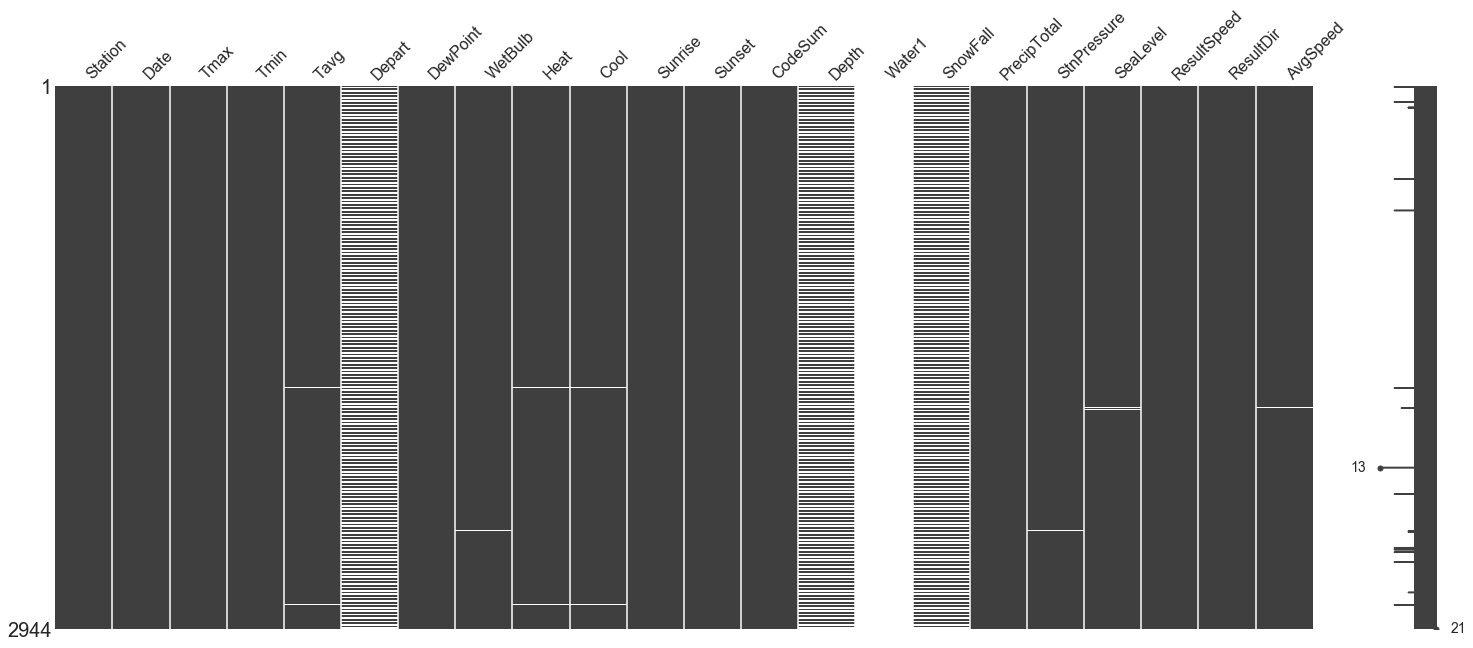

In [30]:
#Visualize missing values as a matrix 
#shows the amount and positions of missing values.
#right hand side is line plot for each row's data completeness
#Water1,Depart,SnowfallDepth have high missing value
#a few missing values on Tavg,Cool, Heat,SeaLevel, StnPressure, WetBulb,AvgSpeed,PrecipTotal
#we will decide which columns to keep
msno.matrix(df_weather);

Decision points for weather data cleaning.
- 'M' values (missing values): Converted to NaN, not use columns with more than 1000 M entries.
- 'T' (trace values): T stands for trace values, more than 0 but lower than the smallest measurement. Replace 'T' values with 0.5* the minimum unit
- Temperature: `Cool` and `Heat` is difference of `Tavg` and 65F base. Need not use. Similarly, can choose not to use `Tmax`, `Tmin`. `Tavg` is sufficient. 
- Pressure: Use `Stnpressure`(Inches Hg). Not use `Sea level`. Missing values can impute using median values (robust to outliers). 
- Humidity: Use `Dewpoint`(F) over `Wetbulb`(F); no missing value.
- Wind Speed: Use `ResultSpeed`(MPH). Not use `AvgSpeed`, `ResultDir`.
- DayLight: Keep `station2`, impute '-' values under `Sunrise` and `Sunset` (missing not at random). Feature engineer `daylight` length, then drop `Sunrise` and `Sunset`.
- Rain: `PrecipTotal` missing values impute from last valid value.
- `CodeSum` not use. Is descriptor of weather phenomenon; redundant.
- `Date`: Convert to Datetime format.

At this stage, we keep things flexible by picking the potential weather features to use, instead of dropping irrelvant ones.

In [31]:
# Preview of lowercasing column names
df_weather.columns.str.lower()

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [32]:
# Lowercase the column names
df_weather.columns = df_weather.columns.str.lower()
# Weather columns to use
wcols_keep = ['tavg','stnpressure','dewpoint','preciptotal','date','sunrise','sunset','resultspeed','station']
# copy of dataframe
df_w = df_weather[wcols_keep].copy()
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 9 columns):
tavg           2933 non-null object
stnpressure    2940 non-null object
dewpoint       2944 non-null int64
preciptotal    2942 non-null object
date           2944 non-null object
sunrise        2944 non-null object
sunset         2944 non-null object
resultspeed    2944 non-null float64
station        2944 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 207.1+ KB


In [33]:
#Set column name to lowercase, shorten if possible.
df_w.columns = ['tavg','stnpress','dewpt','precip','date','sunrise','sunset','windspeed','stn']
# Convert date to datetime format
df_w['date'] = pd.to_datetime(df_w['date'])

In [34]:
#looking up the missing value in stnpress
#4 missing values 
df_w[df_w['stnpress'].isnull()].any(axis = 1)

87      True
848     True
2410    True
2411    True
dtype: bool

In [35]:
#looking up the missing value in tavg
#11 missing values 
df_w[df_w['tavg'].isnull()].any(axis = 1)

7       True
505     True
675     True
1637    True
2067    True
2211    True
2501    True
2511    True
2525    True
2579    True
2811    True
dtype: bool

In [36]:
# Code block for weather data Imputation

# Impute tavg
# Calculate the temperature average 
fill_Tavg = round((df_weather['tmax'] + df_weather['tmin'])/2, 2)
fill_Tavg =fill_Tavg.astype(int)
# Impute the missing value by the calculated Temperature average
# along the index of Tavg with missing value
for avg in df_w[df_w['tavg'].isna()].index:
    df_w['tavg'].loc[avg] = fill_Tavg[avg]

# Code to impute stnpress
df_w['stnpress'].fillna(df_w['stnpress'].median(),inplace=True)

# Code to impute precip
df_w['precip'].fillna(method='ffill', inplace=True)

# Code to impute Sunrise and Sunset for Station 2
# Difference in sunrise/set times between stations should not be significant
"""Replace '-' for values with NaN."""
"""Use last valid observation forward to next valid one."""
df_w['sunrise'].replace('-', np.NaN, inplace=True)
df_w['sunrise'].fillna(method='ffill', inplace=True)
df_w['sunset'].replace('-', np.NaN, inplace=True)
df_w['sunset'].fillna(method='ffill', inplace=True)

# Code to calculate daylight
df_w['sunrise']=pd.to_numeric(df_w['sunrise'])
df_w['sunset']=pd.to_numeric(df_w['sunset'])
df_w['daylight'] = df_w['sunset']-df_w['sunrise']
df_w['daylight'] = df_w['daylight'].map(lambda x: int(str(x)[:2]) + int(str(x)[-2:])/60)
# Review featured engineered daylight column
df_w.head(2)

,tavg,stnpress,dewpt,precip,date,sunrise,sunset,windspeed,stn,daylight
0,67,29.10,51,0.00,2007-05-01,448,1849,1.7,1,14.016667
1,68,29.18,51,0.00,2007-05-01,448,1849,2.7,2,14.016667


In [37]:
# Impute T values
# Review where T values are
df_w.isin(['  T']).sum()

tavg           0
stnpress       0
dewpt          0
precip       318
date           0
sunrise        0
sunset         0
windspeed      0
stn            0
daylight       0
dtype: int64

In [38]:
# Getting the list of unique values for PrecipTotal
sorted(tuple(df_w['precip'].unique()))[:5]

['  T', '0.00', '0.01', '0.02', '0.03']

In [39]:
# Use the minimum measurement (non-zero)
# Assign to min_measurement variable
min_measurement = sorted(tuple(df_w['precip'].unique()))[2]
# Use half the minimum value to replace 'T'
df_w['precip'].replace('  T',float(min_measurement) * 0.5, inplace=True)

In [40]:
# Review datatypes after imputation
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 10 columns):
tavg         2944 non-null object
stnpress     2944 non-null object
dewpt        2944 non-null int64
precip       2944 non-null object
date         2944 non-null datetime64[ns]
sunrise      2944 non-null int64
sunset       2944 non-null int64
windspeed    2944 non-null float64
stn          2944 non-null int64
daylight     2944 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 230.1+ KB


In [41]:
# Code block for datatype conversion
df_w['tavg'] = df_w['tavg'].astype(int)
df_w['stnpress'] = df_w['stnpress'].astype(float)
df_w['dewpt'] = df_w['dewpt'].astype(float)
df_w['precip'] = df_w['precip'].astype(float)


In [42]:
# Checking off datatype of cleaned weather set
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 10 columns):
tavg         2944 non-null int32
stnpress     2944 non-null float64
dewpt        2944 non-null float64
precip       2944 non-null float64
date         2944 non-null datetime64[ns]
sunrise      2944 non-null int64
sunset       2944 non-null int64
windspeed    2944 non-null float64
stn          2944 non-null int64
daylight     2944 non-null float64
dtypes: datetime64[ns](1), float64(5), int32(1), int64(3)
memory usage: 218.6 KB


### EDA

### EDA of train dataset 

In [43]:
# Add week and Year columns
df_tc['wk'] = (df_tc['date'].dt.strftime('%W')).astype(int)
df_tc['yr'] = (df_tc['date'].dt.strftime('%Y')).astype(int)

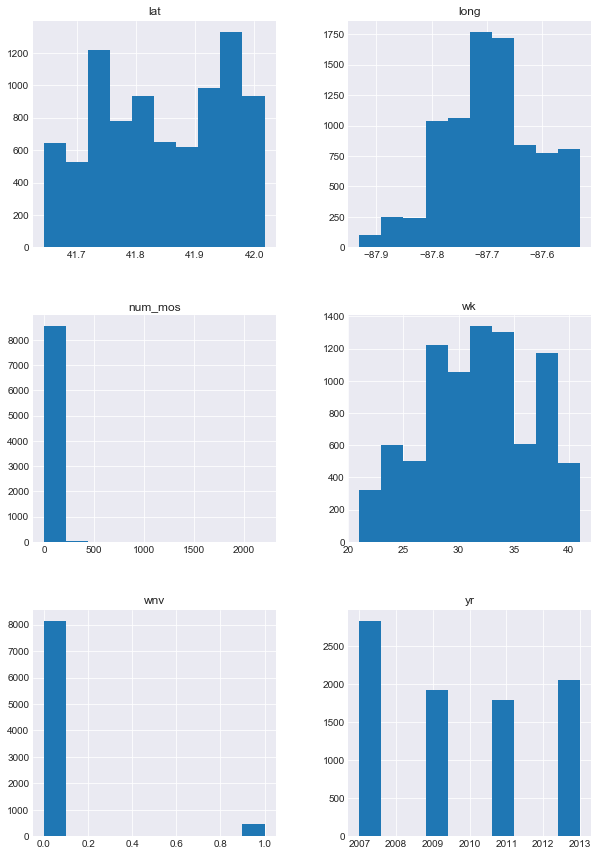

In [44]:
# Distribution of the numerical variables
df_tc.hist(figsize=(10, 15));

From the histograms, (left to right, top to bottom)
- Lat and Lon values represent region of chicago.
- Number of mosquitos consolidated from same traps mostly number above 200, but not more than 500 (right-skewed).
- Peak of mosquitos observations in weeks 31-35.
- Wvn class is imbalanced; majority negative.
- More mosquito observations (traps deployed) in 2007 than other years.

### EDA of Weather

Having 2 different weather stations creates too many variables, therefore we are looking into merging them into 1 but this is dependent on the factors having little to no variance.

In [45]:
#function boxplot:
def subplot_boxplots(dataframe, list_of_columns):
     # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/5)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(16,9), sharey=True) 
    plt.subplots_adjust(hspace=0.3)
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        #plotting a boxplot
        sns.boxplot(x=dataframe['stn'], y=dataframe[column], ax=ax[i])
        #setting y label
        ax[i].set_ylabel(column,fontsize=13)
        #setting x label
        ax[i].set_xlabel('stn',fontsize=13)

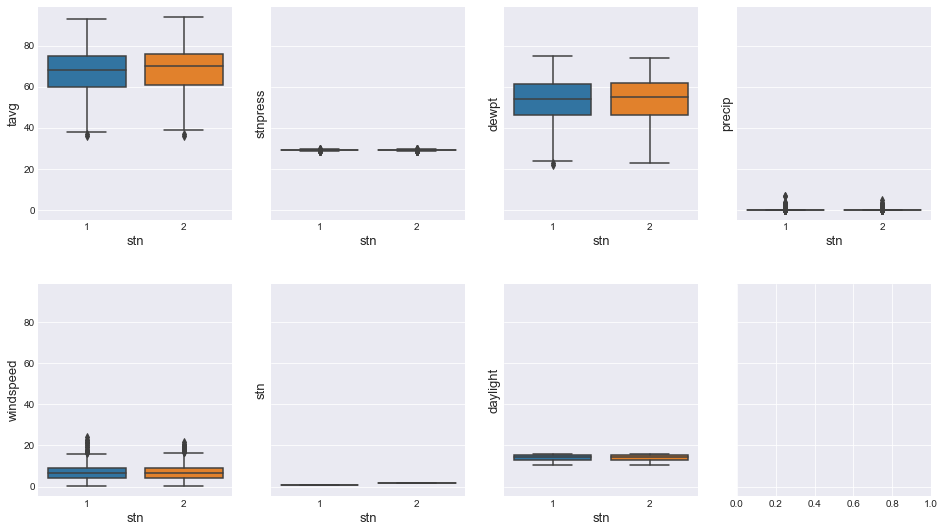

In [46]:
list_of_columns = (df_w.drop(['sunrise','sunset','date'],axis=1).columns)
subplot_boxplots(df_w,list_of_columns)

In general, the weather variables between stations don't vary significantly. We can opt to use weather variables from either stations or average values from both stations. We opted for the later.

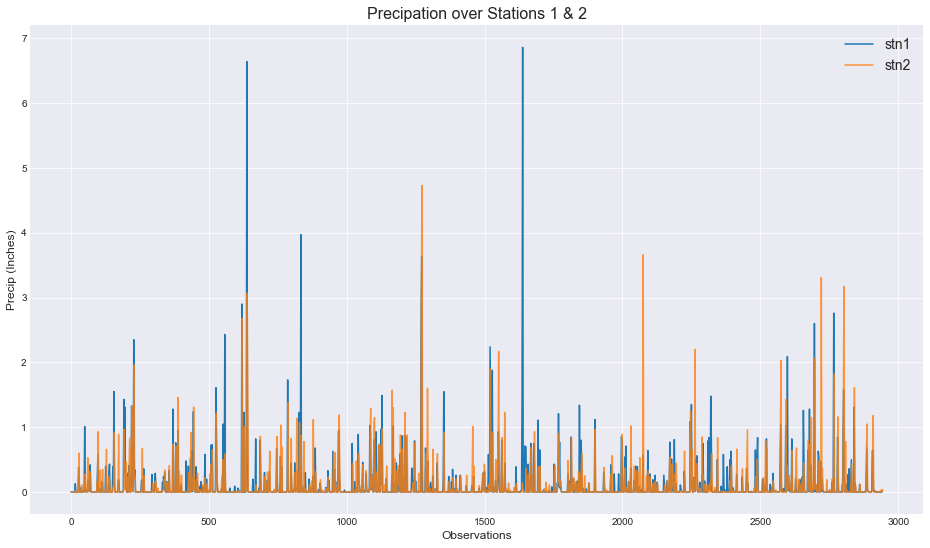

In [47]:
# Lineplot overlap of the two stations for precip
plt.figure(figsize=(16,9))
plt.plot(df_w[df_w['stn']==1]['precip'],label='stn1')
plt.plot(df_w[df_w['stn']==2]['precip'],alpha=00.8,label='stn2')
plt.title('Precipation over Stations 1 & 2', fontsize=16)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Precip (Inches)', fontsize=12)
plt.legend(title='', loc='upper right', prop={'size': 14});

In [48]:
# Since the two weather stations have little variance among its features, 
# we will average them out into a single station

df_w_1 = df_w.iloc[::2,:].drop(['sunrise', 'sunset', 'date'],axis=1)
df_w_2 = df_w.iloc[1::2,:].drop(['sunrise', 'sunset', 'date'],axis=1)

In [49]:
# Checking if df_w_1 is station 1 only
df_w_1.reset_index(inplace=True)
df_w_1.head()

,index,tavg,stnpress,dewpt,precip,windspeed,stn,daylight
0,0,67,29.10,51.0,0.000,1.7,1,14.016667
1,2,51,29.38,42.0,0.000,13.0,1,14.050000
2,4,56,29.39,40.0,0.000,11.7,1,14.083333
3,6,58,29.31,41.0,0.005,10.4,1,14.133333
4,8,60,29.40,38.0,0.005,11.7,1,14.166667


In [50]:
# Checking if df_w_2 is station 2 only
df_w_2.reset_index(inplace=True)
df_w_2.head()

,index,tavg,stnpress,dewpt,precip,windspeed,stn,daylight
0,1,68,29.18,51.0,0.000,2.7,2,14.016667
1,3,52,29.44,42.0,0.000,13.3,2,14.050000
2,5,58,29.46,40.0,0.000,12.9,2,14.083333
3,7,64,29.36,42.0,0.000,10.1,2,14.133333
4,9,60,29.46,39.0,0.005,11.2,2,14.166667


In [51]:
# Getting the mean of station 1 and station 2
df_w_mean = df_w_1.add(df_w_2)/2
df_w_mean.head()

,index,tavg,stnpress,dewpt,precip,windspeed,stn,daylight
0,0.5,67.5,29.140,51.0,0.0000,2.20,1.5,14.016667
1,2.5,51.5,29.410,42.0,0.0000,13.15,1.5,14.050000
2,4.5,57.0,29.425,40.0,0.0000,12.30,1.5,14.083333
3,6.5,61.0,29.335,41.5,0.0025,10.25,1.5,14.133333
4,8.5,60.0,29.430,38.5,0.0050,11.45,1.5,14.166667


In [52]:
# checking final df_w_mean
df_w_mean.drop(['index','stn'],axis=1, inplace=True)

In [53]:
# adding back date to df_w_mean
df_w_mean['date'] = df_w.iloc[::2,:].reset_index()['date']

![alt text](https://)### Merging of Weather and Train


In [54]:
df_w_mean.head()

,tavg,stnpress,dewpt,precip,windspeed,daylight,date
0,67.5,29.140,51.0,0.0000,2.20,14.016667,2007-05-01
1,51.5,29.410,42.0,0.0000,13.15,14.050000,2007-05-02
2,57.0,29.425,40.0,0.0000,12.30,14.083333,2007-05-03
3,61.0,29.335,41.5,0.0025,10.25,14.133333,2007-05-04
4,60.0,29.430,38.5,0.0050,11.45,14.166667,2007-05-05


In [55]:
# Merge train data(left) and cleaned weather(right) on Date
df_train_w = pd.merge(df_tc, df_w_mean, on='date')
df_train_w.head()

,date,trap,spc,lat,long,wnv,num_mos,wk,yr,tavg,stnpress,dewpt,precip,windspeed,daylight
0,2007-05-29,T002,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,1,22,2007,75.5,29.415,58.5,0.0,5.8,15.6
1,2007-05-29,T002,CULEX RESTUANS,41.954690,-87.800991,0,1,22,2007,75.5,29.415,58.5,0.0,5.8,15.6
2,2007-05-29,T007,CULEX RESTUANS,41.994991,-87.769279,0,1,22,2007,75.5,29.415,58.5,0.0,5.8,15.6
3,2007-05-29,T015,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0,1,22,2007,75.5,29.415,58.5,0.0,5.8,15.6
4,2007-05-29,T015,CULEX RESTUANS,41.974089,-87.824812,0,4,22,2007,75.5,29.415,58.5,0.0,5.8,15.6


In [56]:
# Merge test data(left) and cleaned weather(right) on Date
df_test_w = pd.merge(df_test, df_w_mean, on='date')
df_test_w.head()

,date,trap,spc,lat,long,wnv,num_mos,wk,yr,tavg,stnpress,dewpt,precip,windspeed,daylight
0,2007-05-29,T002,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,1,22,2007,75.5,29.415,58.5,0.0,5.8,15.6
1,2007-05-29,T002,CULEX RESTUANS,41.954690,-87.800991,0,1,22,2007,75.5,29.415,58.5,0.0,5.8,15.6
2,2007-05-29,T007,CULEX RESTUANS,41.994991,-87.769279,0,1,22,2007,75.5,29.415,58.5,0.0,5.8,15.6
3,2007-05-29,T015,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0,1,22,2007,75.5,29.415,58.5,0.0,5.8,15.6
4,2007-05-29,T015,CULEX RESTUANS,41.974089,-87.824812,0,4,22,2007,75.5,29.415,58.5,0.0,5.8,15.6


In [95]:

df_test_w.head()

,id,date,spc,trap,lat,long,tavg,stnpress,dewpt,precip,windspeed,daylight
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,75.0,29.31,55.5,0.0,9.15,15.166667
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,75.0,29.31,55.5,0.0,9.15,15.166667
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,75.0,29.31,55.5,0.0,9.15,15.166667
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,75.0,29.31,55.5,0.0,9.15,15.166667
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,75.0,29.31,55.5,0.0,9.15,15.166667


In [96]:
df_test_w.shape

(116293, 12)

In [98]:
df_test_w.describe()

,id,lat,long,tavg,stnpress,dewpt,precip,windspeed,daylight
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.849389,-87.693658,72.106012,29.300755,57.506669,0.153821,6.277967,14.335873
std,33571.041765,0.106593,0.080699,6.327837,0.119403,7.104066,0.409158,2.821593,1.100065
min,1.000000,41.644612,-87.930995,54.000000,29.025000,38.500000,0.000000,1.250000,12.033333
25%,29074.000000,41.753411,-87.750938,67.500000,29.210000,52.000000,0.000000,4.200000,13.383333
50%,58147.000000,41.862292,-87.694991,72.500000,29.305000,58.000000,0.000000,6.050000,14.966667
75%,87220.000000,41.951866,-87.648860,77.500000,29.385000,63.000000,0.095000,7.800000,15.216667
max,116293.000000,42.017430,-87.531635,83.500000,29.620000,71.000000,2.970000,15.550000,15.650000


### EDA on Mosquitoes

In [57]:
# Review Wnv vectors
"""Extract species, NumMosquitos, WnvPresent from merged weather/ train data,
Assign to df_mosWnv"""
df_mosWnv = pd.DataFrame(df_train_w[['spc','num_mos','wnv']])

In [58]:
# Species and Wnv vector by count
df = df_mosWnv.groupby('spc').sum()
df

,num_mos,wnv
spc,,
CULEX ERRATICUS,7,0
CULEX PIPIENS,44671,184
CULEX PIPIENS/RESTUANS,66268,225
CULEX RESTUANS,23431,48
CULEX SALINARIUS,145,0
CULEX TARSALIS,7,0
CULEX TERRITANS,510,0


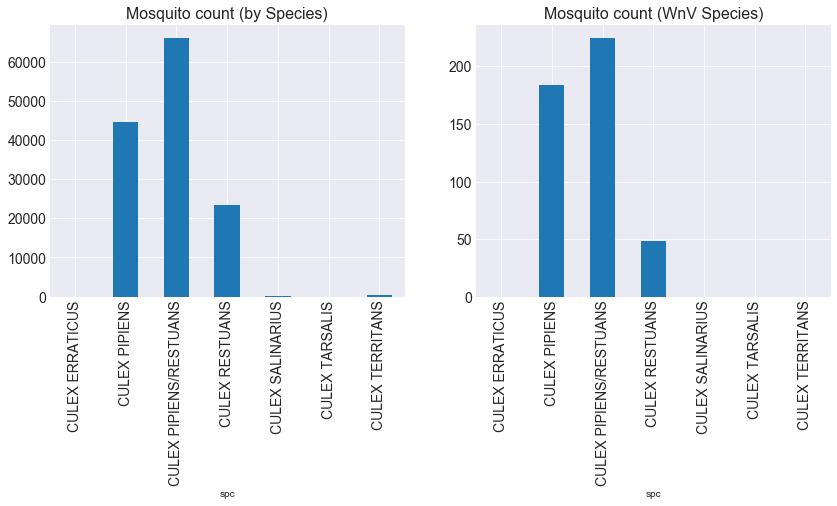

In [59]:
# Subplots for Species distribution(left), vectors distribution (right)
f = plt.figure(figsize=(14,5))

# 1row,2col,1stplot
plt.subplot(1,2,1)
mos_pop = df_mosWnv.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mosquito count (by Species)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
# 1row,2col,2ndplot
plt.subplot(1,2,2)
mos_pop = df_mosWnv.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Mosquito count (WnV Species)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

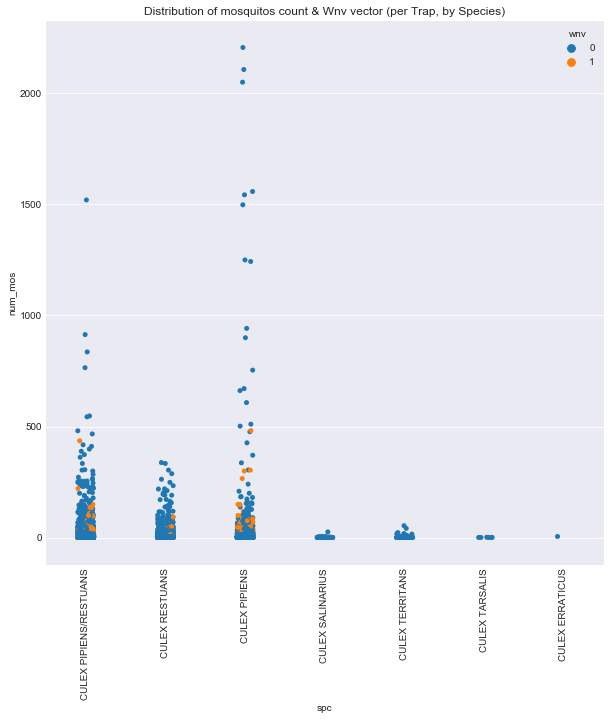

In [60]:
# Distribution of mosquitos count & Wnv vector per Trap, by Species
fig = plt.figure(2, figsize=(10,10))
ax = sns.stripplot(x="spc", y="num_mos", hue="wnv",data=df_train_w,orient='v')
xt = plt.xticks(rotation=90)
plt.title('Distribution of mosquitos count & Wnv vector (per Trap, by Species)')
plt.show()

Of the 8 listed species, technically 

*   List item

*   List item
*   List item


*   List item

only 2 species are vectors of WNV.

### EDA of Traps, Mosquitos, Wnv, Spray coverage

In [61]:
# Review quantity and location of traps
# If traps and location tally, the traps should not be repeated 
# after duplicates removed

# Make a copy from train data
df_traps_train = df_train_w[['trap', 'lat','long']].copy()
# Remove duplicates
df_traps_train.drop_duplicates(inplace=True)

# Return number of traps
print(f"Traps in train data: {len(df_traps_train)}")
# Return distinct instances of traps
print(f"Distinct traps: {len(df_traps_train['trap'].value_counts())}")

# Check the inconsistency in traps, if any
print("Repeated traps:")
print(df_traps_train['trap'].value_counts().sort_values(ascending=False).head(2))
print()

# Do the same for Test set
df_traps_test = df_test[['trap', 'lat','long']].copy()
df_traps_test.drop_duplicates(inplace=True)
print(f"Traps in test data: {len(df_traps_test)}")
print(f"Distinct traps: {len(df_traps_test['trap'].value_counts())}")
print("Repeated traps:")
print(df_traps_test['trap'].value_counts().sort_values(ascending=False).head(2))

Traps in train data: 138
Distinct traps: 136
Repeated traps:
T035    2
T009    2
Name: trap, dtype: int64

Traps in test data: 151
Distinct traps: 149
Repeated traps:
T035    2
T009    2
Name: trap, dtype: int64


In [62]:
# Identify repeated traps
# Train set
print("Train set:")
display(df_traps_train.loc[(df_traps_train['trap']=='T035')|(df_traps_train['trap']=='T009')])

# Test set
print("Test set:")
display(df_traps_test.loc[(df_traps_test['trap']=='T035')|(df_traps_test['trap']=='T009')])

Train set:


,trap,lat,long
28,T009,41.981964,-87.812827
310,T035,41.836644,-87.677737
2840,T009,41.992478,-87.862995
4819,T035,41.763733,-87.742302


Test set:


,trap,lat,long
144,T009,41.981964,-87.812827
568,T035,41.836644,-87.677737
928,T009,41.992478,-87.862995
1096,T035,41.763733,-87.742302


In [63]:
# Change Trap name to deconflict
# Update the trap in cleaned (train+weather) data to Trap name + A
# For train, update on df_train_w
df_train_w.loc[2840,'trap']='T009A'
df_train_w.loc[4819,'trap']='T035A'
# For test, update on origin df_test, since we used copy to seek the error traps
df_test.loc[928,'trap']='T009A'
df_test.loc[1096,'trap']='T035A'
# Sanity check
print(f"Distinct traps should be 151 after rename: {len(df_test['trap'].value_counts())}")

Distinct traps should be 151 after rename: 151


### Collective trap deployed, Wnv presence and spray coverage over 2007 to 2013

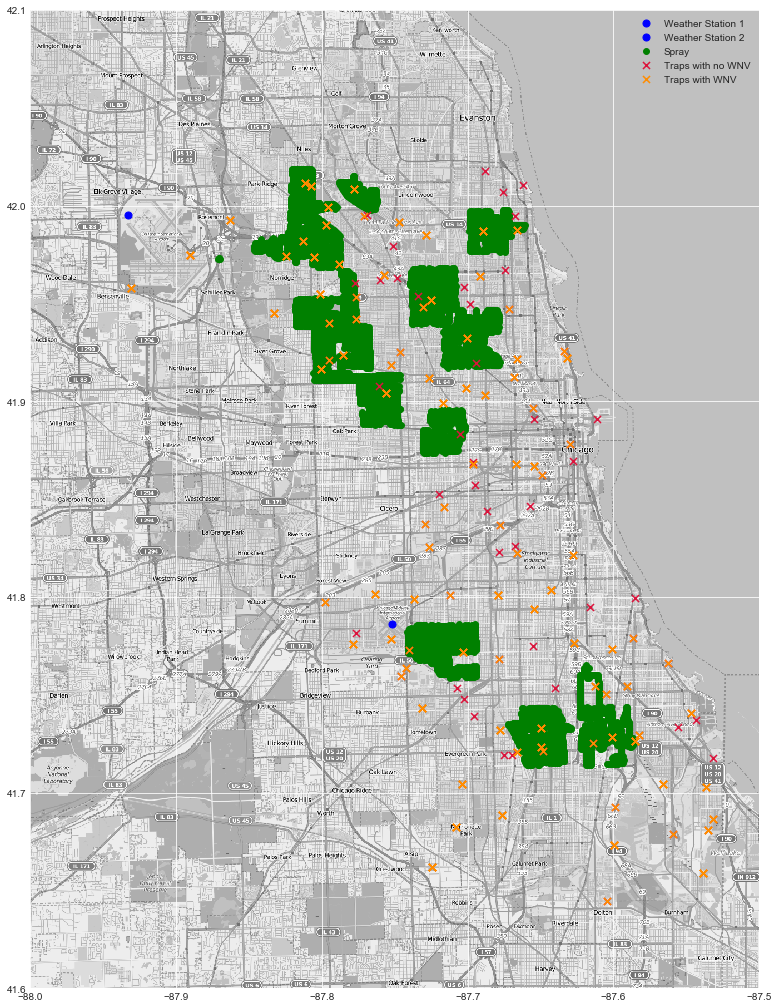

In [64]:
# Code from src folder file 'measurement_locations.ipynb

url ='https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/mapdata_copyright_openstreetmap_contributors.txt'
mapdata = np.loadtxt(url)
# In lieu of cleaned trap info, updated trap source.
#traps = pd.read_csv("https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/train.csv")[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
traps = df_train_w[['date', 'trap','long', 'lat', 'wnv']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(14,18))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# weather station 1
lats_station1 = 41.995
long_station1 =  -87.933
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)

# weather station 2
lats_station2 = 41.786 
long_station2 = -87.752
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)

# spray data
lats_spray = df_s['lat']
long_spray = df_s['long']
spray_scatter = plt.scatter(x=long_spray, y=lats_spray, c='g', s=35)

# trap data
locations = traps[['long', 'lat']].drop_duplicates().values
trap_scatter = plt.scatter(locations[:,0], locations[:,1], marker='x', c='crimson', s=50)

# trap data with presence of WNV
lats_wnv = traps[traps['wnv'] == 1]['lat']
long_wnv = traps[traps['wnv'] == 1]['long']
wnv_scatter = plt.scatter(x=long_wnv, y=lats_wnv, marker='x', c='darkorange', s=50)

# Legend
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter, 
            'Spray':spray_scatter, 'Traps with no WNV':trap_scatter, 'Traps with WNV':wnv_scatter});


Is there any trend in trap deployment, wnv presence and before (2007-2009) and after spray (2011-2013)? Let's do a preliminary check, then drill down from there.

In [65]:
# Spraying conducted in 2011 and 2013
df_s['date'].dt.year.unique()

array([2011, 2013], dtype=int64)

In [66]:
# year period in train data
df_train_w['date'].dt.year.unique()

array([2007, 2009, 2011, 2013], dtype=int64)

In [67]:
# Identify index where 2011 starts
df_train_w.loc[(df_train_w['yr'])==2011].head(2)

,date,trap,spc,lat,long,wnv,num_mos,wk,yr,tavg,stnpress,dewpt,precip,windspeed,daylight
4758,2011-06-10,T003,CULEX PIPIENS/RESTUANS,41.964242,-87.757639,0,3,23,2011,60.5,29.235,56.0,0.48,6.25,15.166667
4759,2011-06-10,T013,CULEX PIPIENS/RESTUANS,41.923738,-87.785288,0,1,23,2011,60.5,29.235,56.0,0.48,6.25,15.166667


![alt text](https://)Index for before spray is from 0 to 4757 of df_train_w.

### Map of Trap deployed, Wnv presence before spray(2007-2009) and after (2011-2013)

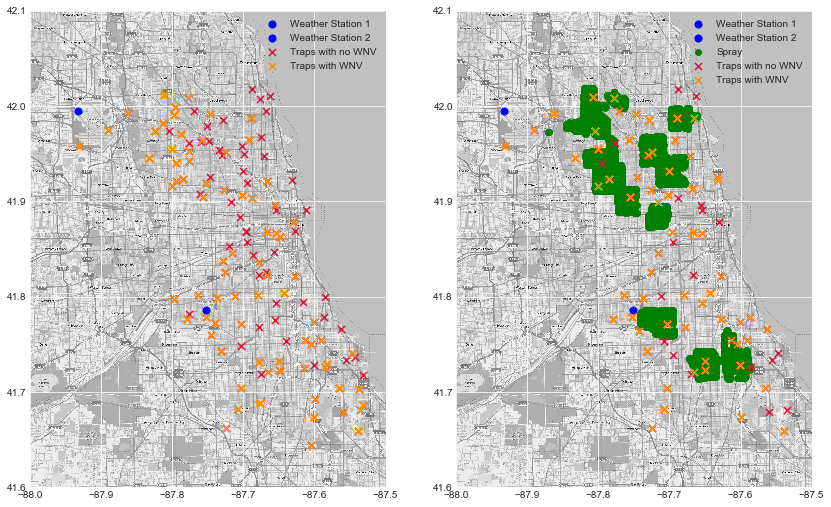

In [68]:
# Code from src folder file 'measurement_locations.ipynb

url ='https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/mapdata_copyright_openstreetmap_contributors.txt'
mapdata = np.loadtxt(url)
# In lieu of cleaned trap info, updated trap source.
#traps = pd.read_csv("https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/train.csv")[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

# Before spray traps data
traps_bspray = df_train_w[['date', 'trap','long', 'lat', 'wnv']][0:4758]
# After spray traps data
traps_aspray = df_train_w[['date', 'trap','long', 'lat', 'wnv']][4759:]

# Set Mapping aspect
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# Lat/Lon of Weather Stations
# Station 1
lats_station1 = 41.995
long_station1 =  -87.933
# Station 2
lats_station2 = 41.786 
long_station2 = -87.752

# Set Figure size
plt.figure(figsize=(14,18))

# Before spray(left)
plt.subplot(1,2,1)
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

# weather station 1
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)
# weather station 2
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)

# trap data
locations = traps_bspray[['long', 'lat']].drop_duplicates().values
trap_scatter = plt.scatter(locations[:,0], locations[:,1], marker='x', c='crimson', s=50)

# trap data with presence of WNV
lats_wnv = traps_bspray[traps_bspray['wnv'] == 1]['lat']
long_wnv = traps_bspray[traps_bspray['wnv'] == 1]['long']
wnv_scatter = plt.scatter(x=long_wnv, y=lats_wnv, marker='x', c='darkorange', s=50)

# Legend
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter,
            'Traps with no WNV':trap_scatter, 'Traps with WNV':wnv_scatter});

# After spray(right)
plt.subplot(1,2,2)
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

# weather station 1
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)
# weather station 2
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)

# spray data
lats_spray = df_s['lat']
long_spray = df_s['long']
spray_scatter = plt.scatter(x=long_spray, y=lats_spray, c='g', s=35)

# trap data
locations = traps_aspray[['long', 'lat']].drop_duplicates().values
trap_scatter = plt.scatter(locations[:,0], locations[:,1], marker='x', c='crimson', s=50)

# trap data with presence of WNV
lats_wnv = traps_aspray[traps_aspray['wnv'] == 1]['lat']
long_wnv = traps_aspray[traps_aspray['wnv'] == 1]['long']
wnv_scatter = plt.scatter(x=long_wnv, y=lats_wnv, marker='x', c='darkorange', s=50)

# Legend
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter, 
            'Spray':spray_scatter, 'Traps with no WNV':trap_scatter, 'Traps with WNV':wnv_scatter});

It appears the number of traps decreased in years 2011 and 2013. Spraying commenced in year 2011. Did the instances of mosquitos (and Wnv) decreased from 2011 onwards? Let's investigate deeper.

In [69]:
# Identify index where 2007,2009,2011,2013 starts
yr_lst=[2007,2009,2011,2013]
print('Index in df_train_w for start of each year:')
for i in yr_lst:
    print(df_train_w.loc[(df_train_w['yr'])==i].head(1).index)

Index in df_train_w for start of each year:
Int64Index([0], dtype='int64')
Int64Index([2837], dtype='int64')
Int64Index([4758], dtype='int64')
Int64Index([6552], dtype='int64')


In [70]:
# Mos n Wnv for each yr period
mos_2007 = df_train_w[['spc','trap','num_mos','wnv']][0:2837]
mos_2009 = df_train_w[['spc','trap','num_mos','wnv']][2837:4758]
mos_2011 = df_train_w[['spc','trap','num_mos','wnv']][4758:6552]
mos_2013 = df_train_w[['spc','trap','num_mos','wnv']][6552:]


*italicized text*### Mos count for each year

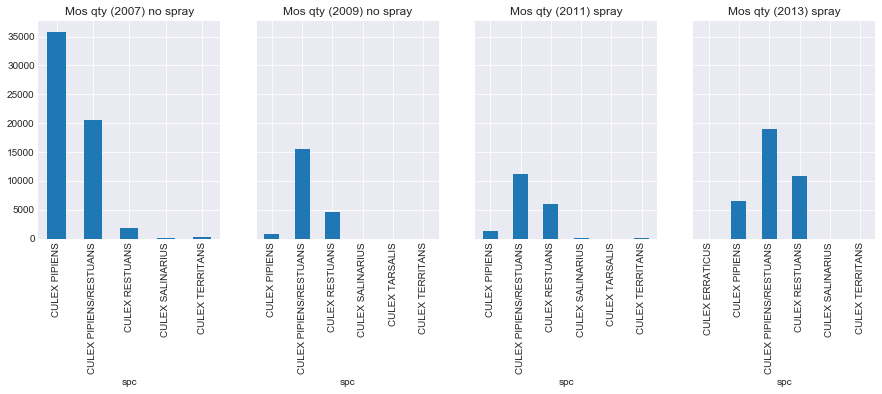

In [71]:
# Set figure size
f = plt.figure(figsize=(15,4))

# Subplots for Species distribution(left), vectors distribution (right)
# 2row,2col,1stplot (Top left)
ax1 = plt.subplot(1,4,1)
mos_2007.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mos qty (2007) no spray',fontsize=12)

# 2row,2col,2ndplot (Top right), share x-axis
ax2 = plt.subplot(1,4,2,sharey=ax1)
mos_2009.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mos qty (2009) no spray',fontsize=12)

# 2row,2col,3rdplot (Bottom left), share x-axis
ax3 = plt.subplot(1,4,3,sharey=ax1)
mos_2011.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mos qty (2011) spray',fontsize=12)

# 2row,2col,4thplot (Bottom right), share x-axis
ax4 = plt.subplot(1,4,4,sharey=ax1)
mos_2013.groupby('spc')['num_mos'].sum().plot(kind='bar')
plt.title('Mos qty (2013) spray',fontsize=12);

- Something happended to bring down the number of mosquitos trapped in 2009. 
- Mos population decreased from 2007 to 2011, with commencement of spraying.
- Population increased in 2013. We could look deeper to find out why.
- Spraying has some effect in decreasing mosquito quantity captured in traps. We could infer that spraying in general, has an effect in controlling the general mosquito population. 

### Wnv prevalence for each year

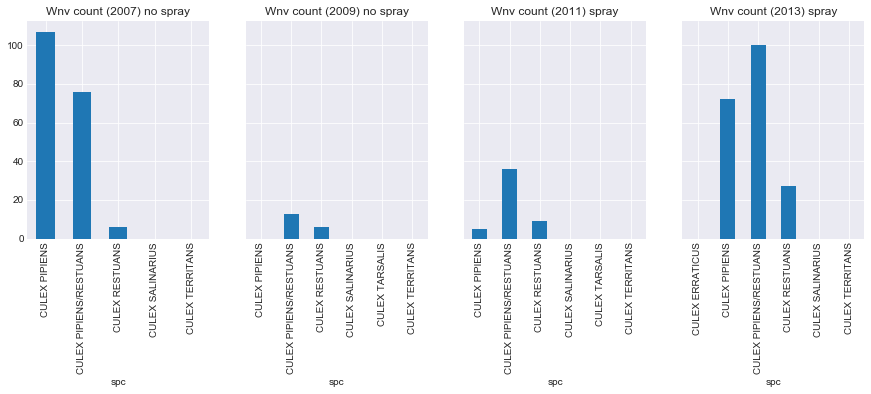

In [72]:
# Mos count for each year
# Set figure size
f = plt.figure(figsize=(15,4))

# Subplots for Species distribution(left), vectors distribution (right)
# 2row,2col,1stplot (Top left)
ax1 = plt.subplot(1,4,1)
mos_2007.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Wnv count (2007) no spray',fontsize=12)

# 2row,2col,2ndplot (Top right), share x-axis
ax2 = plt.subplot(1,4,2,sharey=ax1)
mos_2009.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Wnv count (2009) no spray',fontsize=12)

# 2row,2col,3rdplot (Bottom left), share x-axis
ax3 = plt.subplot(1,4,3,sharey=ax1)
mos_2011.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Wnv count (2011) spray',fontsize=12)

# 2row,2col,4thplot (Bottom right), share x-axis
ax4 = plt.subplot(1,4,4,sharey=ax1)
mos_2013.groupby('spc')['wnv'].sum().plot(kind='bar')
plt.title('Wnv count (2013) spray',fontsize=12);



```
# This is formatted as code
```

There is a a spike in Wnv cases (outbreak) in 2013. While spraying is effective in controlling mosquito population, it **needs to be more targetted** at eliminating Wnv vectors.

In [73]:
# Investigate if the trend in mosquito count is correlated with number of traps deployed
mos_yrlst = [mos_2007,mos_2009,mos_2011,mos_2013]
yr_mark = 2007
for i in mos_yrlst:
    print(f"yr:{yr_mark}, traps deployed:{len(i['trap'].unique())}, collectns:{i['trap'].value_counts().sum()}")
    yr_mark+=2 

yr:2007, traps deployed:116, collectns:2837
yr:2009, traps deployed:74, collectns:1921
yr:2011, traps deployed:81, collectns:1794
yr:2013, traps deployed:74, collectns:2058


Indeed, the number of traps deployed decreased from 2009 onwards. This correlates with the decrease in traps in the map for period 2011-2013.

In [74]:
# Put the figures into dataframe for plotting
data = {'yr':  ['2007','2009','2011','2013'],
        'traps_dplyd': [116,74,81,74],
        'collect' : [2837,1921,1794,2058]}

df_trp = pd.DataFrame(data,columns=['yr','traps_dplyd','collect'])
df_trp['yr'] = pd.to_datetime(df_trp['yr'])
df_trp['yr'] = df_trp['yr'].dt.year

In [75]:
# Checking off datatypes
df_trp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
yr             4 non-null int64
traps_dplyd    4 non-null int64
collect        4 non-null int64
dtypes: int64(3)
memory usage: 224.0 bytes


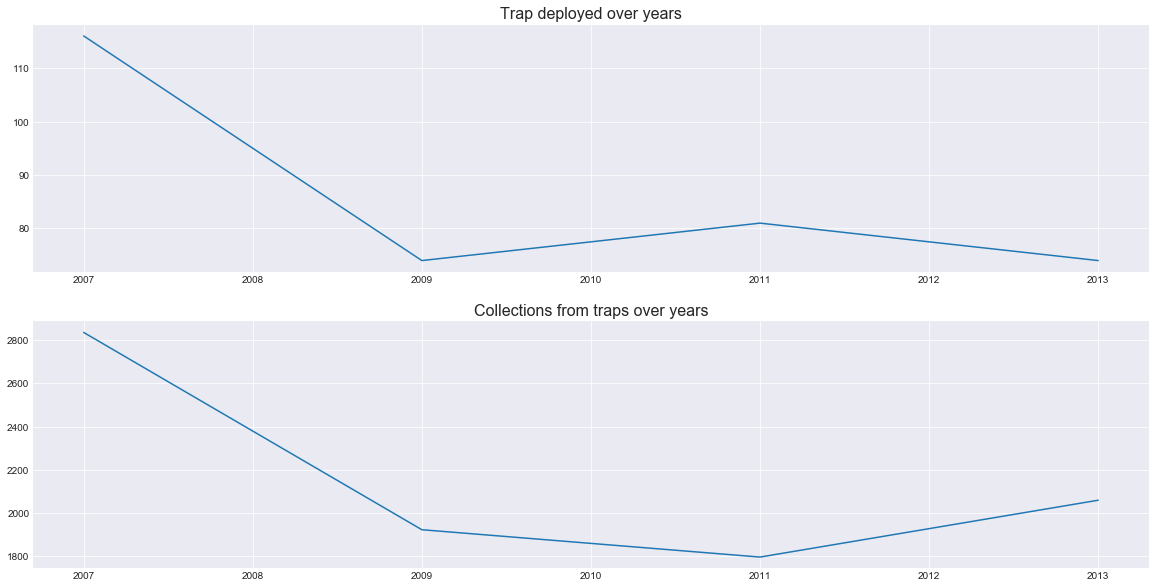

In [76]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
# plot
ax1.plot(df_trp['yr'], df_trp['traps_dplyd'])
ax2.plot(df_trp['yr'], df_trp['collect'])
# title
ax1.set_title('Trap deployed over years',fontsize=16)
ax2.set_title('Collections from traps over years',fontsize=16);

The decrease in trap deployment likely accounted for the decrease in number of mosquitos reported. However, with the number of traps deployed and collections being generally consistent 2009-2013, we could rule out the number of traps deployed and collections being contributing factors to increase in mosquito and Wnv cases in year 2013, pending one more investigation area: were the locations of traps very different across the years (e.g. between 2011 and 2013)?

In [77]:
# Investigate difference in traps deployed between 2011 and 2013
trap_lst11 = np.array(mos_2011['trap'])
trap_lst13 = np.array(mos_2013['trap'])

In [78]:
# Unique traps in deployed in 2013 but not in 2011.
np.setdiff1d(trap_lst13, trap_lst11)

array(['T054C', 'T094B'], dtype=object)

In [79]:
# dataframe for wnv outbreak analysis
df_2013wnv_pos = pd.DataFrame(df_train_w.loc[(df_train_w['yr']==2013)&(df_train_w['wnv']==1)])
df_2013wnv_neg = pd.DataFrame(df_train_w.loc[(df_train_w['yr']==2013)&(df_train_w['wnv']==0)])

In [80]:
# How much wnv cases did these two new traps contribute?
print(df_2013wnv_pos.loc[df_2013wnv_pos['trap']=='T054C']['num_mos'])
print(df_2013wnv_neg.loc[df_2013wnv_neg['trap']=='T094B']['num_mos'])

7803    45
Name: num_mos, dtype: int64
6983     2
6984     3
7100    20
7228    13
7229     3
Name: num_mos, dtype: int64


T054C trap alone only accounted for 45 cases of wnv. The new traps couldn't account for the spike in wnv for 2013. We could infer that the location of the traps (with wnv) deployed for 2013 would provide good insights into the area for targetted spraying. Where are these traps if visualised on map?

In [81]:
# Create a year column for spray data
df_s['yr'] = pd.to_datetime(df_s['date'])
df_s['yr'] = df_s['yr'].dt.year
df_s.head()

,date,time,lat,long,yr
95,2011-09-07,7:52:52 PM,41.981433,-87.787777,2011
96,2011-09-07,7:53:02 PM,41.980998,-87.787778,2011
97,2011-09-07,7:53:12 PM,41.980560,-87.787762,2011
98,2011-09-07,7:53:22 PM,41.980198,-87.787758,2011
99,2011-09-07,7:53:32 PM,41.979752,-87.787765,2011


In [82]:
# Review the count of traps with wnv incidences
display(df_2013wnv_pos.groupby(['trap']).sum()[['num_mos']].sort_values(['num_mos'],ascending=False)[:5])

,num_mos
trap,
T900,1615
T030,313
T233,281
T013,269
T002,246


In [83]:
# Empirically consider traps with more than 100 mosquitos as traps with high incidences
df_2013_posh = df_2013wnv_pos.groupby(['trap',\
                                       'lat',\
                                       'long']).sum()[['num_mos']].sort_values(['num_mos'],ascending=False).reset_index()
df_2013_posh = df_2013_posh.loc[df_2013_posh['num_mos']>100]

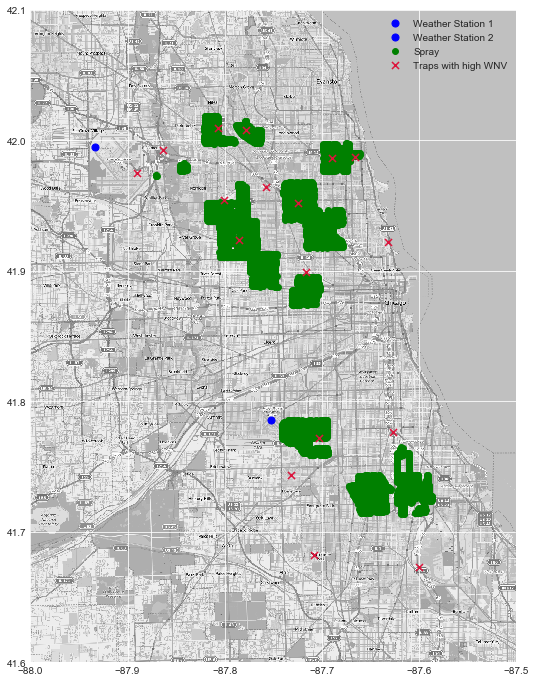

In [84]:
# Code from src folder file 'measurement_locations.ipynb

url ='https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/mapdata_copyright_openstreetmap_contributors.txt'
mapdata = np.loadtxt(url)
traps = df_2013wnv_pos[['date', 'trap','long', 'lat', 'wnv']]
spray13 = df_s.loc[(df_s['yr']==2013)]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(12,12))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# weather station 1
lats_station1 = 41.995
long_station1 =  -87.933
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)

# weather station 2
lats_station2 = 41.786 
long_station2 = -87.752
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)

# spray data
lats_spray = spray13['lat']
long_spray = spray13['long']
spray_scatter = plt.scatter(x=long_spray, y=lats_spray, c='g', s=35)

# trap data with high WNV count
lats_wnvh = df_2013_posh['lat']
long_wnvh = df_2013_posh['long']
trap_scatter = plt.scatter(x=long_wnvh, y=lats_wnvh, marker='x', c='crimson', s=50)


# Legend
plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter, 
            'Spray':spray_scatter, 'Traps with high WNV':trap_scatter});

- The spraying operation missed some areas with high incidences of Wnv. Recommend targetting these areas in next spray ops.
- Spraying coverage missing some location of high wnv is only part of the picture.

Could the weather conditions have contributed to spike in mosquito population, and therefore high wnv incidence? And also, was there a reduction in spray ops frequency? We investigate these next. 



```
# This is formatted as code
```

### Time series plots

In [85]:
# Filter by year and create new dataframes
df_trainw_2007 = df_train_w[df_train_w['date'].dt.year==2007]
df_trainw_2009 = df_train_w[df_train_w['date'].dt.year==2009]
df_trainw_2011 = df_train_w[df_train_w['date'].dt.year==2011]
df_trainw_2013 = df_train_w[df_train_w['date'].dt.year==2013]

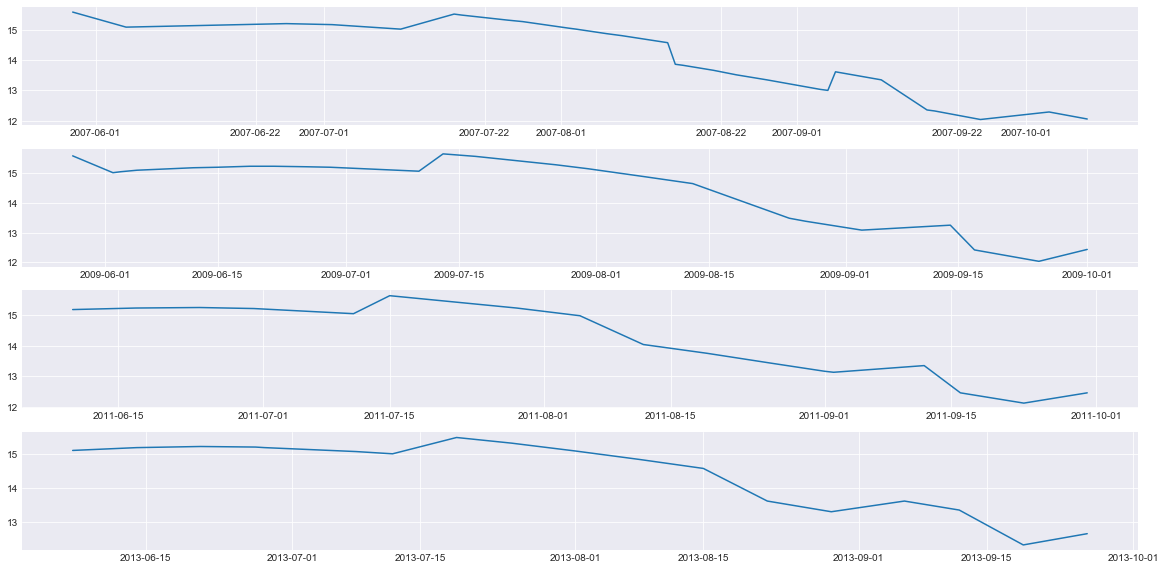

In [86]:
# Plot the daylight against year
fig, axes = plt.subplots(nrows=4, figsize=(20,10))
axes[0].plot(df_trainw_2007['date'], df_trainw_2007['daylight'])
axes[1].plot(df_trainw_2009['date'], df_trainw_2009['daylight'])
axes[2].plot(df_trainw_2011['date'], df_trainw_2011['daylight'])
axes[3].plot(df_trainw_2013['date'], df_trainw_2013['daylight']);

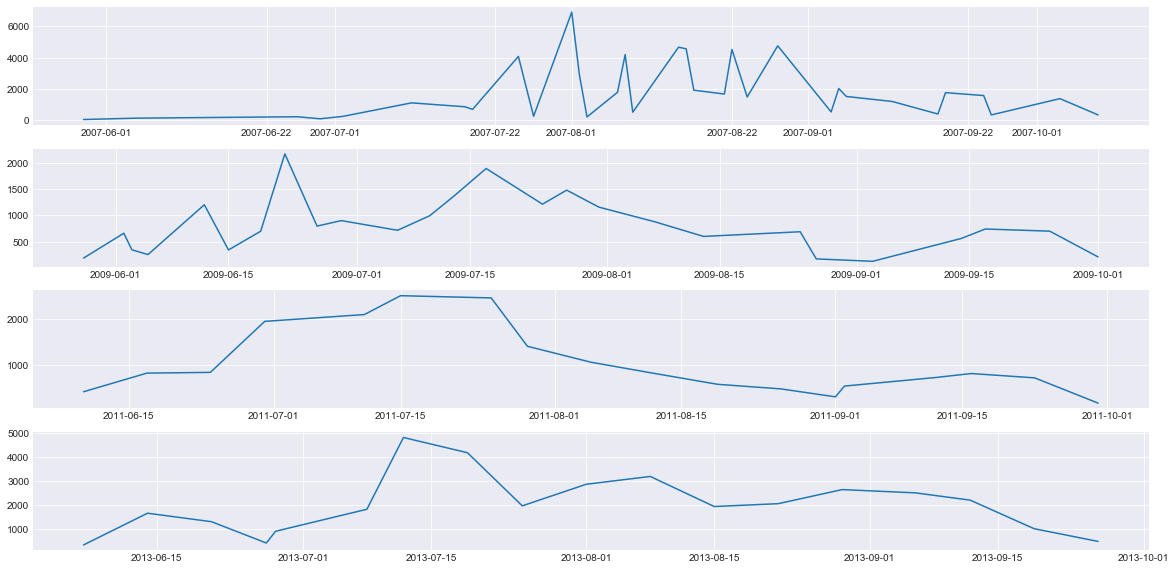

In [87]:
# Plot the sum of mosquitos
fig, axes = plt.subplots(nrows=4, figsize=(20,10))
axes[0].plot(df_trainw_2007.groupby('date')['num_mos'].sum())
axes[1].plot(df_trainw_2009.groupby('date')['num_mos'].sum())
axes[2].plot(df_trainw_2011.groupby('date')['num_mos'].sum())
axes[3].plot(df_trainw_2013.groupby('date')['num_mos'].sum());

In [88]:
#using the new method
df_nt = df_train_w.groupby(['date', 'trap','spc','lat','long','wnv']).sum()[["num_mos"]].reset_index()
df_nt_2007 = df_nt[df_nt['date'].dt.year==2007]
df_nt_2009 = df_nt[df_nt['date'].dt.year==2009]
df_nt_2011= df_nt[df_nt['date'].dt.year==2011]
df_nt_2013 = df_nt[df_nt['date'].dt.year==2013]

#created a copy to set date as index.
df_train_w_2 = df_train_w.copy()
df_train_w_2.set_index(pd.DatetimeIndex(df_train_w_2['date']), inplace=True)

#creating timestamps
ts_2007 = pd.to_datetime('1/1/2007')
ts_2008 = pd.to_datetime('1/1/2008')
ts_2009 = pd.to_datetime('1/1/2009')
ts_2010 = pd.to_datetime('1/1/2010')
ts_2011 = pd.to_datetime('1/1/2011')
ts_2012 = pd.to_datetime('1/1/2012')
ts_2013 = pd.to_datetime('1/1/2013')

In [89]:
# spray dates
df_s['date'].unique()

array(['2011-09-07T00:00:00.000000000', '2013-07-17T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-08T00:00:00.000000000',
       '2013-08-15T00:00:00.000000000', '2013-08-16T00:00:00.000000000',
       '2013-08-22T00:00:00.000000000', '2013-08-29T00:00:00.000000000',
       '2013-09-05T00:00:00.000000000'], dtype='datetime64[ns]')

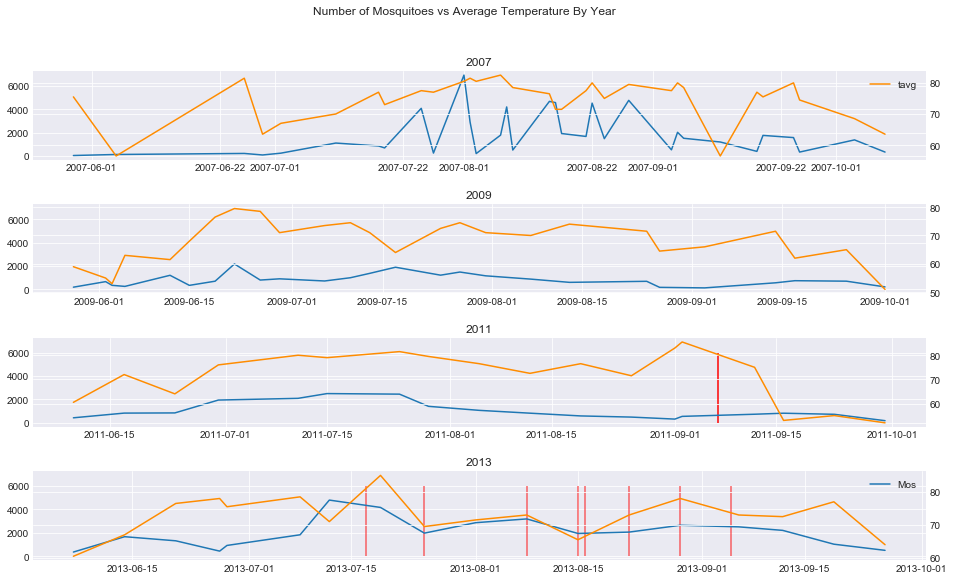

In [90]:
#Number of mosquitoes vs Avg Temp
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Number of Mosquitoes vs Average Temperature By Year')

#2007
ax5=ax1.twinx()
ax1.plot(df_nt_2007.groupby('date')['num_mos'].sum())
ax5.plot(df_train_w_2[df_train_w_2['date'] < ts_2008]['tavg'], color='darkorange', label='tavg')
ax1.set_title('2007')
ax5.legend()

#2009
ax6=ax2.twinx()
ax6.plot(df_train_w_2[(df_train_w_2['date'] < ts_2010) & (df_train_w_2['date'] > ts_2009)]['tavg'], color='darkorange')
ax2.plot(df_nt_2009.groupby('date')['num_mos'].sum())
ax2.set_title('2009')

#2011
ax7=ax3.twinx()
ax7.plot(df_train_w_2[(df_train_w_2['date'] < ts_2012) & (df_train_w_2['date'] > ts_2010)]['tavg'], color='darkorange')
ax3.plot(df_nt_2011.groupby('date')['num_mos'].sum())
ax3.vlines(x=pd.to_datetime('2011-09-07', format='%Y-%m-%d'),ymin=0,ymax=6000,color='r')
ax3.set_title('2011')

#2013
ax8=ax4.twinx()
ax8.plot(df_train_w_2[(df_train_w_2['date'] > ts_2013)]['tavg'], color='darkorange',label='Tavg')
ax4.plot(df_nt_2013.groupby('date')['num_mos'].sum(),label='Mos')
for x in df_s['date'].unique()[1:]:
   ax4.vlines(x=pd.to_datetime(x),ymin=0,ymax=6000,color='r',alpha=0.6)
ax4.set_title('2013')
ax4.legend();

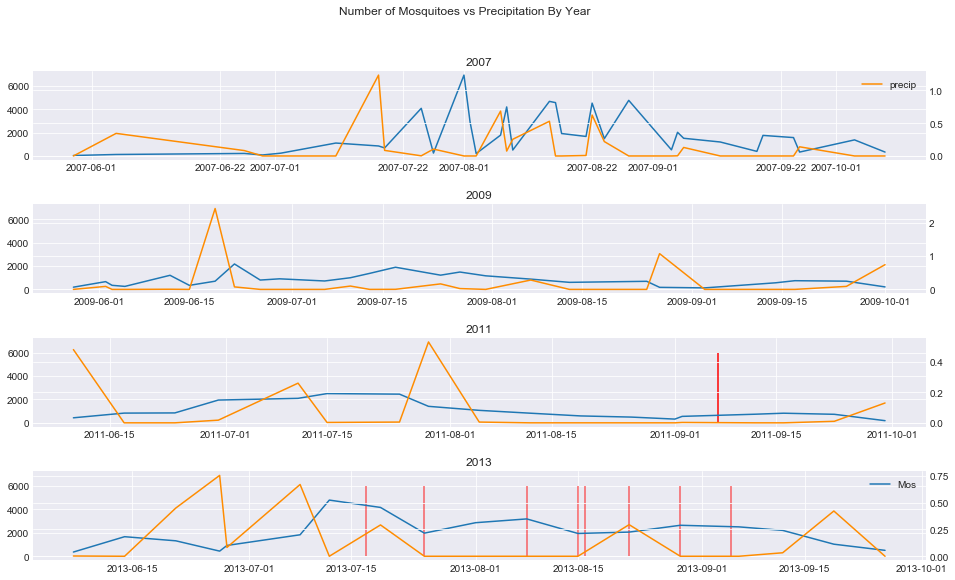

In [91]:
#Number of mosquitoes vs Precip
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Number of Mosquitoes vs Precipitation By Year')

#2007
ax5=ax1.twinx()
ax1.plot(df_nt_2007.groupby('date')['num_mos'].sum())
ax5.plot(df_train_w_2[df_train_w_2['date'] < ts_2008]['precip'], color='darkorange', label='precip')
ax1.set_title('2007')
ax5.legend()

#2009
ax6=ax2.twinx()
ax6.plot(df_train_w_2[(df_train_w_2['date'] < ts_2010) & (df_train_w_2['date'] > ts_2009)]['precip'], color='darkorange')
ax2.plot(df_nt_2009.groupby('date')['num_mos'].sum())
ax2.set_title('2009')

#2011
ax7=ax3.twinx()
ax7.plot(df_train_w_2[(df_train_w_2['date'] < ts_2012) & (df_train_w_2['date'] > ts_2010)]['precip'], color='darkorange')
ax3.plot(df_nt_2011.groupby('date')['num_mos'].sum())
ax3.vlines(x=pd.to_datetime('2011-09-07', format='%Y-%m-%d'),ymin=0,ymax=6000,color='r')
ax3.set_title('2011')

#2013
ax8=ax4.twinx()
ax8.plot(df_train_w_2[(df_train_w_2['date'] > ts_2013)]['precip'], color='darkorange',label='precip')
ax4.plot(df_nt_2013.groupby('date')['num_mos'].sum(),label='Mos')
for x in df_s['date'].unique()[1:]:
   ax4.vlines(x=pd.to_datetime(x),ymin=0,ymax=6000,color='r',alpha=0.6)
ax4.set_title('2013')
ax4.legend();

[link text](https://)## Feature Engineering

In [92]:
# Review the species in train data and test data
print(df_train_w['spc'].unique())
print(df_test['spc'].unique())

['CULEX PIPIENS/RESTUANS' 'CULEX RESTUANS' 'CULEX PIPIENS'
 'CULEX SALINARIUS' 'CULEX TERRITANS' 'CULEX TARSALIS' 'CULEX ERRATICUS']
['CULEX PIPIENS/RESTUANS' 'CULEX RESTUANS' 'CULEX PIPIENS'
 'CULEX SALINARIUS' 'CULEX TERRITANS' 'CULEX TARSALIS' 'UNSPECIFIED CULEX'
 'CULEX ERRATICUS']


There is a new species in the test set `UNSPECIFIED CULEX`. We could remove this in the test data by **setting it as the reference category to drop**.

In [93]:
# WIP
# one-hot encoding for species
df_train_w = pd.get_dummies(df_train_w,columns=['spc'])



# Saving to csv


#### !names of cleaned dataframe:
- spray : df_s
- test: df_test
- train: df_tc
- weather: df_w
- merged train and weather : df_train_w

In [94]:
# saving to CSV. All final working files will be uploaded onto github
#df_train_w.to_csv('./datasets/predict-west-nile-virus/df_train_weather_cleaned.csv')
#df_s.to_csv('./datasets/predict-west-nile-virus/df_spray_cleaned.csv')